In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

In [12]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=100
L=n*T

N_grid=40000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))
st=200
fn=39799

In [13]:
sample=75
q_s=[]
q2_s=[]
qt_s=[]

M=2*dw

move=20

alpha=0.999
t_t=np.linspace(0,L+2.5*T,N_grid+int(1/(1-alpha)))


sigma=.05
mu=(2*dw+sigma*move)*(1-alpha)


for jj in range(sample):
    start=time.time()
    k0_t=np.zeros(N_grid+int(1/(1-alpha)), np.dtype(float))
    for i in range(N_grid+int(1/(1-alpha))):
        if i==0:
            k0_t[i]=2*dw
        else:
            dif=np.random.normal(mu, sigma)
            k0_t[i]=alpha*k0_t[i-1]+dif
            if k0_t[i]<0:
                k0_t[i]=2*k0_t[i-1]-k0_t[i]

    k0=np.zeros(N_grid, np.dtype(float))
    k0=k0_t[int(1/(1-alpha)):]
    if k0[0]<(2*dw):
        print("КОСТЫЛЬ")
        k0[0]=2*dw+sigma*move

    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)

    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)
    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

    q_t_ar=[]

    for i in range(fn-p-st):
        mk=np.array([np.mean(k0[st+i:st+i+p-1])]*p)
        sk=(sum(np.multiply(k0[st+i:st+i+p-1], k0[st+i:st+i+p-1])*h))
        q_t_ar.append((sum(np.multiply(k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1], k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1])*h))/sk)

    qt=max(q_t_ar)
    if qt>.8:
        qt_s.append(1)
    else:
        qt_s.append(0)
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    sk2=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
    q2=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk2
    q_s.append(q)
    q2_s.append(q2)
    stop=time.time()
    print(jj, ' ----- ', stop-start)    

0  -----  30.302697896957397
1  -----  30.577815771102905
2  -----  31.502998113632202
3  -----  31.530526638031006
4  -----  31.278586864471436
5  -----  31.587523698806763
6  -----  31.54038906097412
КОСТЫЛЬ
7  -----  31.52177333831787
КОСТЫЛЬ
8  -----  31.645473957061768
9  -----  31.348860502243042
10  -----  31.519525051116943
11  -----  31.53735661506653
12  -----  31.701329469680786
13  -----  31.42360544204712
14  -----  31.639549732208252
15  -----  31.540183305740356
16  -----  31.47682237625122
17  -----  31.609617948532104
18  -----  31.490735292434692
19  -----  31.282262325286865
20  -----  31.56033182144165
21  -----  31.94786262512207
22  -----  31.479039907455444
23  -----  31.140002965927124
24  -----  31.663597583770752
КОСТЫЛЬ
25  -----  31.418790817260742
26  -----  31.447391986846924
27  -----  30.70372176170349
28  -----  31.495418787002563
КОСТЫЛЬ
29  -----  31.63613772392273
КОСТЫЛЬ
30  -----  31.15611958503723
31  -----  31.397793292999268
32  -----  30.852066

In [14]:
sum(qt_s)/75

0.96

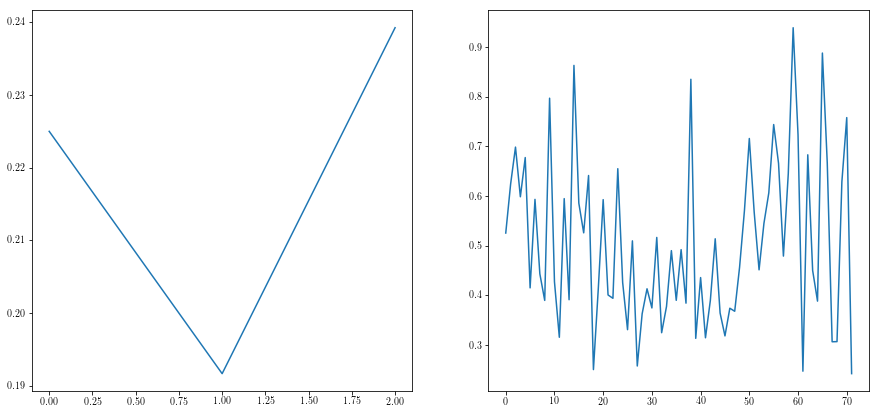

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#ax1.figure(figsize=(7,7))
#ax2.figure(figsize=(7,7))
ax1.plot(q_s[np.array(qt_s)==0])
ax2.plot(q_s[np.array(qt_s)==1])
plt.show()

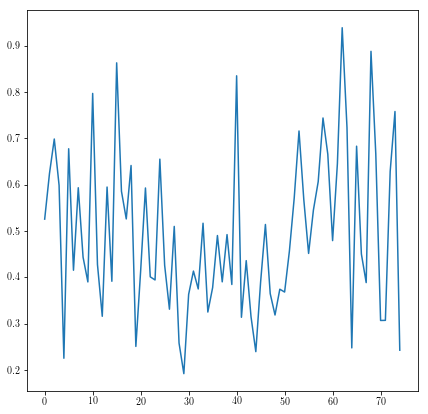

0.493591938966 0.172150703476


In [15]:
plt.figure(figsize=(7,7))
plt.plot(q_s)
plt.show()
q_s=np.array(q_s)
print(np.mean(q_s), np.std(q_s))

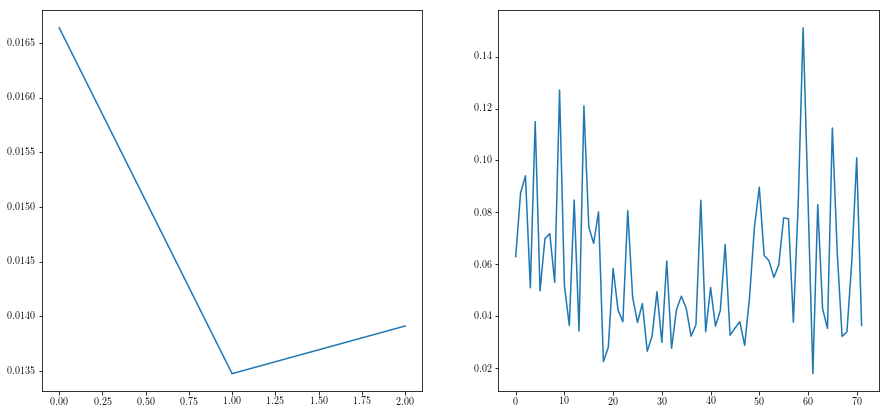

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#ax1.figure(figsize=(7,7))
#ax2.figure(figsize=(7,7))
ax1.plot(q2_s[np.array(qt_s)==0])
ax2.plot(q2_s[np.array(qt_s)==1])
plt.show()

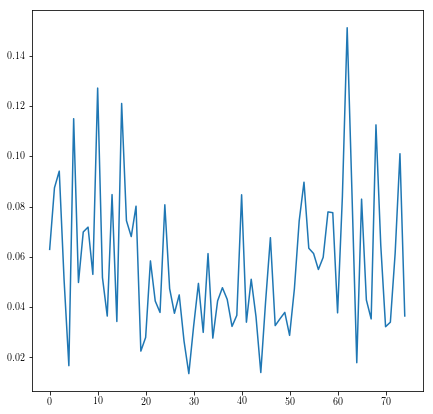

0.0565324907632 0.0280119157361


In [16]:
plt.figure(figsize=(7,7))
plt.plot(q2_s)
plt.show()
q2_s=np.array(q2_s)
print(np.mean(q2_s), np.std(q2_s))

In [38]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=50
L=n*T

N_grid=20000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))
st=200
fn=19799

In [39]:
sample=50
q_s=[]
q2_s=[]
qt_s=[]

M=2*dw

move=20

alpha=0.999
t_t=np.linspace(0,L+2.5*T,N_grid+int(1/(1-alpha)))


sigma=.05
mu=(2*dw+sigma*move)*(1-alpha)


for jj in range(sample):
    start=time.time()
    k0_t=np.zeros(N_grid+int(1/(1-alpha)), np.dtype(float))
    for i in range(N_grid+int(1/(1-alpha))):
        if i==0:
            k0_t[i]=2*dw
        else:
            dif=np.random.normal(mu, sigma)
            k0_t[i]=alpha*k0_t[i-1]+dif
            if k0_t[i]<0:
                k0_t[i]=2*k0_t[i-1]-k0_t[i]

    k0=np.zeros(N_grid, np.dtype(float))
    k0=k0_t[int(1/(1-alpha)):]
    if k0[0]<(2*dw):
        print("КОСТЫЛЬ")
        k0[0]=2*dw+sigma*move

    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)

    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)
    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

    q_t_ar=[]

    for i in range(fn-p-st):
        mk=np.array([np.mean(k0[st+i:st+i+p-1])]*p)
        sk=(sum(np.multiply(k0[st+i:st+i+p-1], k0[st+i:st+i+p-1])*h))
        q_t_ar.append((sum(np.multiply(k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1], k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1])*h))/sk)

    qt=max(q_t_ar)
    if qt>.8:
        qt_s.append(1)
    else:
        qt_s.append(0)
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    sk2=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
    q2=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk2
    q_s.append(q)
    q2_s.append(q2)
    stop=time.time()
    print(jj, ' ----- ', stop-start)

0  -----  14.425119400024414
1  -----  14.826258182525635
КОСТЫЛЬ
2  -----  14.964341402053833
3  -----  14.52721905708313
КОСТЫЛЬ
4  -----  14.614674091339111
5  -----  14.481896877288818
КОСТЫЛЬ
6  -----  15.27821683883667
7  -----  15.090963363647461
8  -----  15.162837982177734
9  -----  15.245945930480957
10  -----  15.340908765792847
11  -----  15.25723147392273
КОСТЫЛЬ
12  -----  15.237853050231934
КОСТЫЛЬ
13  -----  14.682560920715332
14  -----  13.810808897018433
15  -----  13.868336200714111
16  -----  13.807976007461548
17  -----  13.798287153244019
18  -----  13.919122219085693
19  -----  14.208561182022095
20  -----  14.066392660140991
21  -----  15.298933744430542
22  -----  15.325326204299927
23  -----  15.693015098571777
24  -----  15.362622499465942
КОСТЫЛЬ
25  -----  15.29181170463562
КОСТЫЛЬ
26  -----  15.144448041915894
КОСТЫЛЬ
27  -----  14.966624975204468
КОСТЫЛЬ
28  -----  15.455317497253418
29  -----  15.218369483947754
30  -----  15.254141330718994
КОСТЫЛЬ
31  

In [44]:
sum(qt_s)/sample

0.84

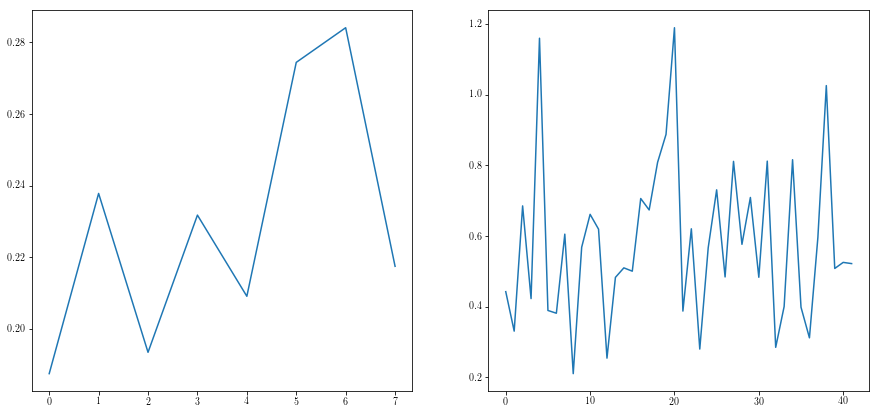

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#ax1.figure(figsize=(7,7))
#ax2.figure(figsize=(7,7))
ax1.plot(q_s[np.array(qt_s)==0])
ax2.plot(q_s[np.array(qt_s)==1])
plt.show()

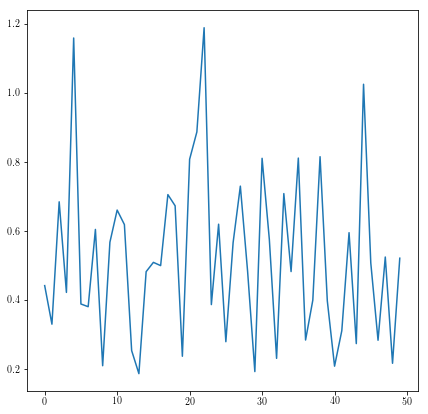

0.523398255776 0.24332344959


In [43]:
plt.figure(figsize=(7,7))
plt.plot(q_s)
plt.show()
q_s=np.array(q_s)
print(np.mean(q_s), np.std(q_s))

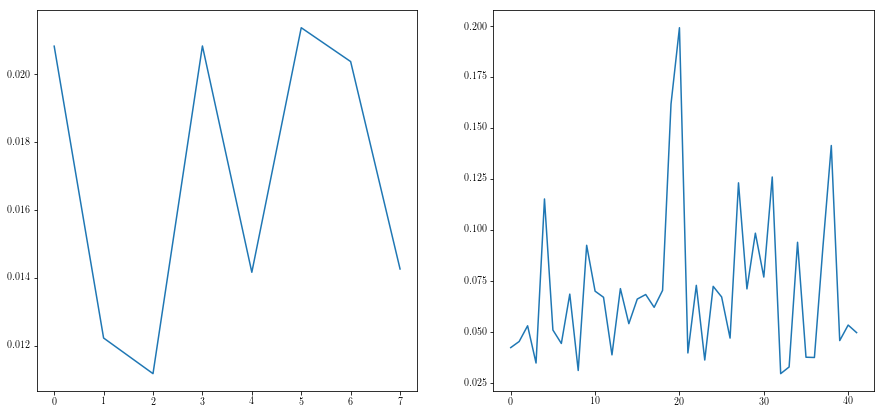

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#ax1.figure(figsize=(7,7))
#ax2.figure(figsize=(7,7))
ax1.plot(q2_s[np.array(qt_s)==0])
ax2.plot(q2_s[np.array(qt_s)==1])
plt.show()

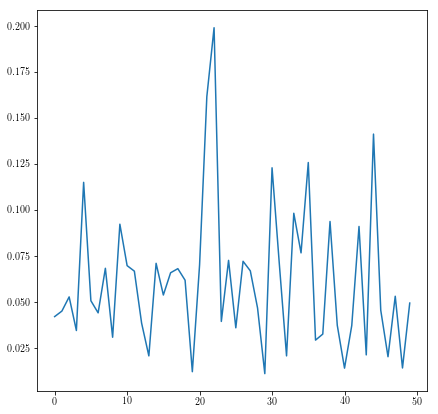

0.0615883420985 0.0388714880907


In [49]:
plt.figure(figsize=(7,7))
plt.plot(q2_s)
plt.show()
q2_s=np.array(q2_s)
print(np.mean(q2_s), np.std(q2_s))

In [51]:
sample=50
q_s=[]
q2_s=[]
qt_s=[]

M=2*dw

move=30

alpha=0.999
t_t=np.linspace(0,L+2.5*T,N_grid+int(1/(1-alpha)))


sigma=.05
mu=(2*dw+sigma*move)*(1-alpha)


for jj in range(sample):
    start=time.time()
    k0_t=np.zeros(N_grid+int(1/(1-alpha)), np.dtype(float))
    for i in range(N_grid+int(1/(1-alpha))):
        if i==0:
            k0_t[i]=2*dw
        else:
            dif=np.random.normal(mu, sigma)
            k0_t[i]=alpha*k0_t[i-1]+dif
            if k0_t[i]<0:
                k0_t[i]=2*k0_t[i-1]-k0_t[i]

    k0=np.zeros(N_grid, np.dtype(float))
    k0=k0_t[int(1/(1-alpha)):]
    if k0[0]<(2*dw):
        print("КОСТЫЛЬ")
        k0[0]=2*dw+sigma*move

    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)

    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)
    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

    q_t_ar=[]

    for i in range(fn-p-st):
        mk=np.array([np.mean(k0[st+i:st+i+p-1])]*p)
        sk=(sum(np.multiply(k0[st+i:st+i+p-1], k0[st+i:st+i+p-1])*h))
        q_t_ar.append((sum(np.multiply(k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1], k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1])*h))/sk)

    qt=max(q_t_ar)
    if qt>.8:
        qt_s.append(1)
    else:
        qt_s.append(0)
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    sk2=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
    q2=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk2
    q_s.append(q)
    q2_s.append(q2)
    stop=time.time()
    print(jj, ' ----- ', stop-start)

0  -----  14.643645286560059
1  -----  14.765621185302734
2  -----  14.559884309768677
3  -----  14.652397871017456
4  -----  15.228185892105103
5  -----  15.006209135055542
6  -----  14.73224687576294
7  -----  13.968593120574951
8  -----  13.8387610912323
9  -----  13.80053448677063
10  -----  13.80846619606018
11  -----  13.808387041091919
12  -----  13.749693393707275
13  -----  13.749776363372803
14  -----  13.753408193588257
15  -----  13.728850364685059
КОСТЫЛЬ
16  -----  13.699717044830322
17  -----  13.760414123535156
18  -----  13.816434860229492
19  -----  13.725189685821533
20  -----  13.700049877166748
21  -----  13.71922492980957
22  -----  13.726146221160889
23  -----  13.748887538909912
24  -----  13.926838636398315
25  -----  13.852540016174316
26  -----  13.826062440872192
27  -----  13.821172714233398
КОСТЫЛЬ
28  -----  13.757042169570923
КОСТЫЛЬ
29  -----  13.947397232055664
30  -----  13.597149848937988
31  -----  13.762415170669556
32  -----  13.911147117614746
33

In [52]:
sum(qt_s)/sample

0.52

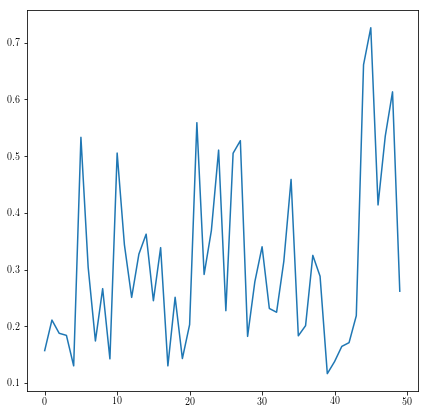

0.308587625381 0.152940923393


In [53]:
plt.figure(figsize=(7,7))
plt.plot(q_s)
plt.show()
q_s=np.array(q_s)
print(np.mean(q_s), np.std(q_s))

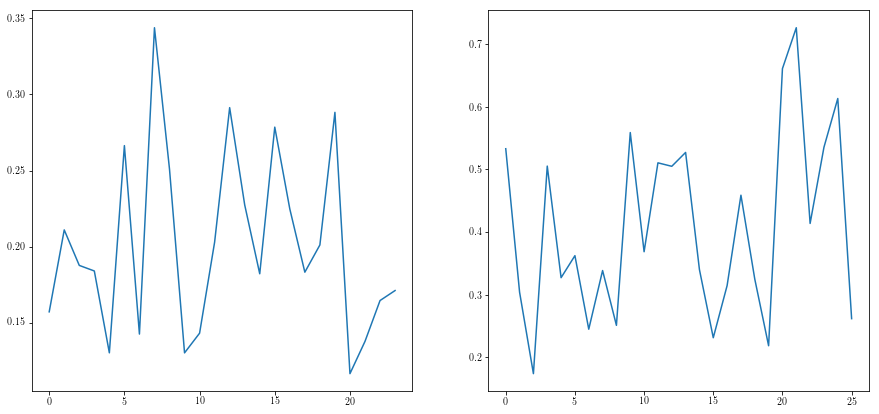

In [54]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#ax1.figure(figsize=(7,7))
#ax2.figure(figsize=(7,7))
ax1.plot(q_s[np.array(qt_s)==0])
ax2.plot(q_s[np.array(qt_s)==1])
plt.show()

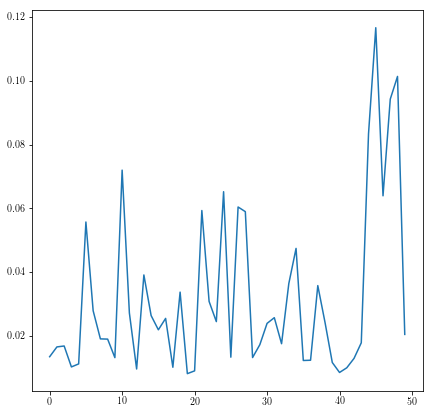

0.0320470175412 0.0262527247474


In [55]:
plt.figure(figsize=(7,7))
plt.plot(q2_s)
plt.show()
q2_s=np.array(q2_s)
print(np.mean(q2_s), np.std(q2_s))

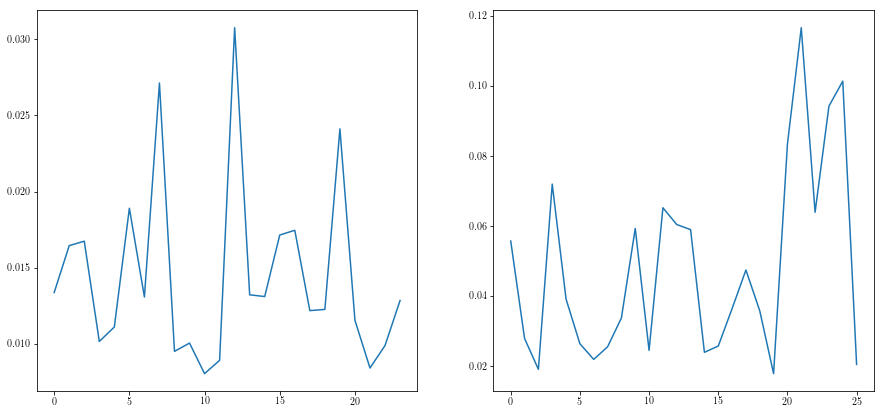

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#ax1.figure(figsize=(7,7))
#ax2.figure(figsize=(7,7))
ax1.plot(q2_s[np.array(qt_s)==0])
ax2.plot(q2_s[np.array(qt_s)==1])
plt.show()

In [57]:
sample=50
q_s=[]
q2_s=[]
qt_s=[]

M=2*dw

move=40

alpha=0.999
t_t=np.linspace(0,L+2.5*T,N_grid+int(1/(1-alpha)))


sigma=.05
mu=(2*dw+sigma*move)*(1-alpha)


for jj in range(sample):
    start=time.time()
    k0_t=np.zeros(N_grid+int(1/(1-alpha)), np.dtype(float))
    for i in range(N_grid+int(1/(1-alpha))):
        if i==0:
            k0_t[i]=2*dw
        else:
            dif=np.random.normal(mu, sigma)
            k0_t[i]=alpha*k0_t[i-1]+dif
            if k0_t[i]<0:
                k0_t[i]=2*k0_t[i-1]-k0_t[i]

    k0=np.zeros(N_grid, np.dtype(float))
    k0=k0_t[int(1/(1-alpha)):]
    if k0[0]<(2*dw):
        print("КОСТЫЛЬ")
        k0[0]=2*dw+sigma*move

    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)

    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h

            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan

    phi0=np.arccos(C_0)
    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

    q_t_ar=[]

    for i in range(fn-p-st):
        mk=np.array([np.mean(k0[st+i:st+i+p-1])]*p)
        sk=(sum(np.multiply(k0[st+i:st+i+p-1], k0[st+i:st+i+p-1])*h))
        q_t_ar.append((sum(np.multiply(k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1], k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1])*h))/sk)

    qt=max(q_t_ar)
    if qt>.8:
        qt_s.append(1)
    else:
        qt_s.append(0)
    mk=np.array([np.mean(k0[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
    sk2=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
    q2=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk2
    q_s.append(q)
    q2_s.append(q2)
    stop=time.time()
    print(jj, ' ----- ', stop-start)

0  -----  14.715312957763672
1  -----  14.582785844802856
2  -----  14.347705125808716
3  -----  14.618606567382812
4  -----  14.367933750152588
5  -----  13.877537727355957
6  -----  13.88948106765747
7  -----  13.764835834503174
8  -----  13.691798686981201
9  -----  13.769162654876709
10  -----  13.85175085067749
11  -----  13.844935894012451
12  -----  13.777805089950562
13  -----  13.740442276000977
14  -----  13.901249885559082
15  -----  13.950797319412231
16  -----  13.77851676940918
17  -----  13.91362738609314
18  -----  13.795787334442139
19  -----  13.77674388885498
КОСТЫЛЬ
20  -----  13.807801961898804
21  -----  13.852096557617188
22  -----  13.820470809936523
23  -----  13.826290130615234
24  -----  13.80539608001709
25  -----  13.711649179458618
26  -----  13.974961042404175
27  -----  13.7683744430542
28  -----  13.771657943725586
КОСТЫЛЬ
29  -----  13.870350122451782
30  -----  13.774436712265015
31  -----  13.93327784538269
32  -----  13.899422645568848
33  -----  13

In [58]:
sum(qt_s)/sample

0.24

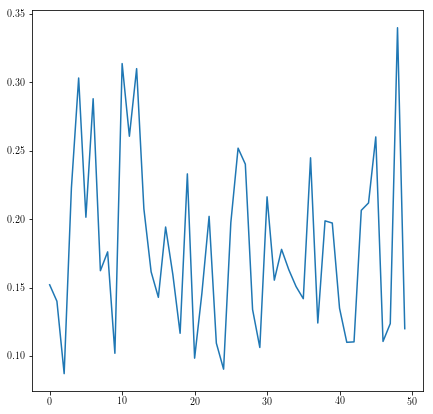

0.180311179811 0.0639461098323


In [59]:
plt.figure(figsize=(7,7))
plt.plot(q_s)
plt.show()
q_s=np.array(q_s)
print(np.mean(q_s), np.std(q_s))

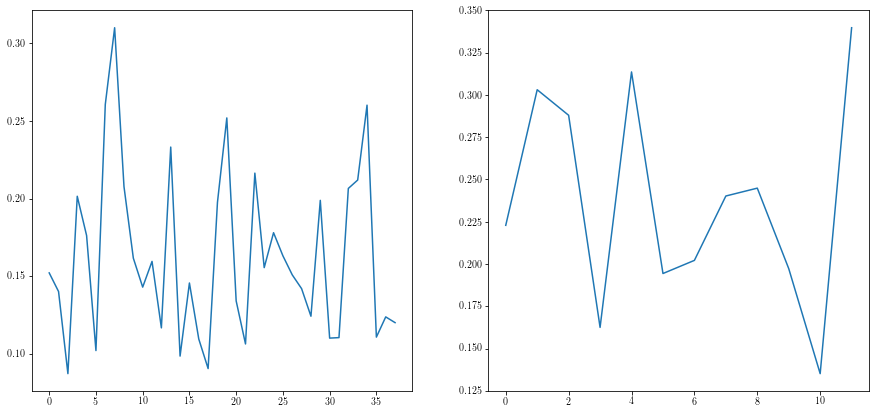

In [60]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#ax1.figure(figsize=(7,7))
#ax2.figure(figsize=(7,7))
ax1.plot(q_s[np.array(qt_s)==0])
ax2.plot(q_s[np.array(qt_s)==1])
plt.show()

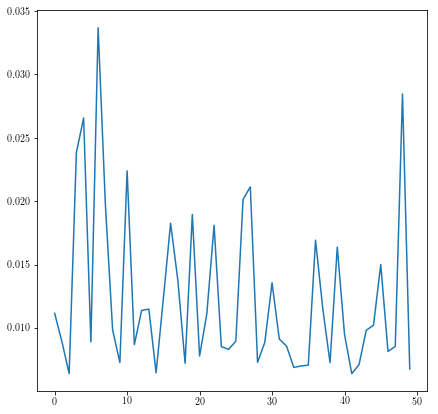

0.0124520072096 0.00640487993463


In [61]:
plt.figure(figsize=(7,7))
plt.plot(q2_s)
plt.show()
q2_s=np.array(q2_s)
print(np.mean(q2_s), np.std(q2_s))

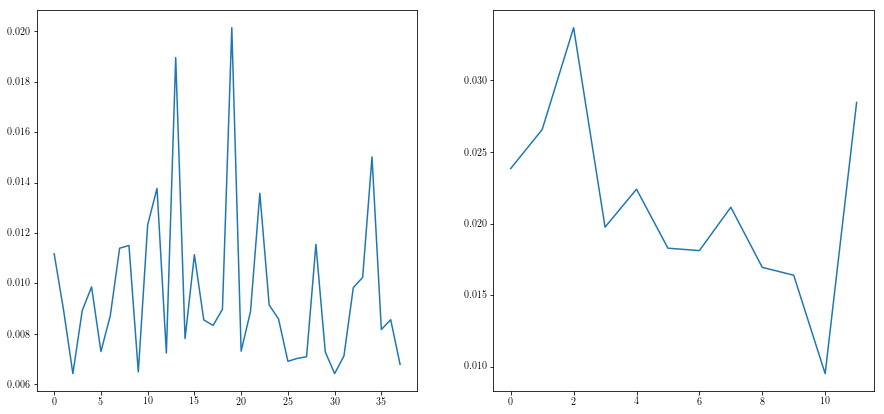

In [62]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#ax1.figure(figsize=(7,7))
#ax2.figure(figsize=(7,7))
ax1.plot(q2_s[np.array(qt_s)==0])
ax2.plot(q2_s[np.array(qt_s)==1])
plt.show()